In [55]:
import pandas as pd
import seaborn as sns
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
start = dt.datetime(2006, 1, 2)
end = dt.datetime.today()

# Bank of America (BAC)
bac = web.DataReader('BAC', 'yahoo', start, end)

# CitiGroup (C)
c = web.DataReader('C', 'yahoo', start, end)

# Goldman Sachs (GS)
gs = web.DataReader('GS', 'yahoo', start, end)

# JPMorgan Chase (JPM)
jpm = web.DataReader('JPM', 'yahoo', start, end)

# Morgan Stanley (MS)
ms = web.DataReader('MS', 'yahoo', start, end)

# Wells Fargo (WFC)
wfc = web.DataReader('wfc', 'yahoo', start, end)

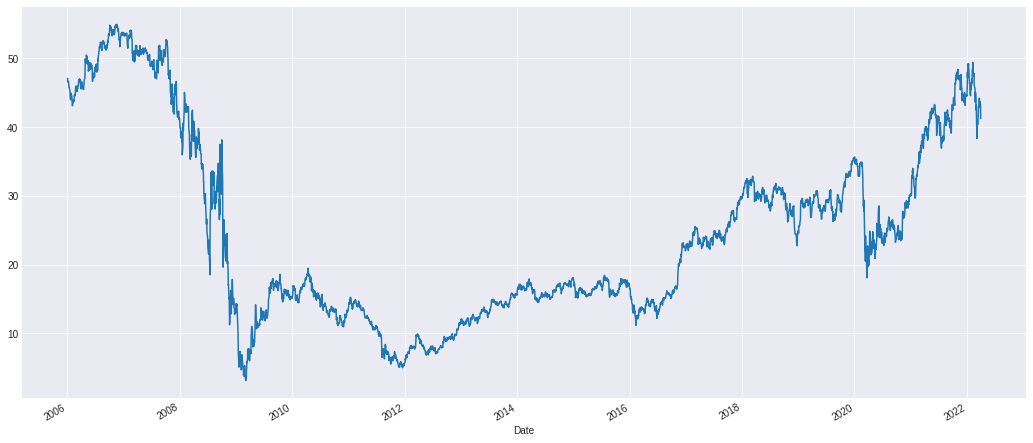

In [58]:
plt.style.use('seaborn-darkgrid')
bac['Close'].plot(figsize=(18, 8));

In [59]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [60]:
# Concatenando os dataframes dos bancos em um (bank_stocks).
# Argumento das chaves igual à lista de tickers
bank_stocks = pd.concat([bac, c, gs, jpm, ms, wfc], axis=1, keys=tickers)

# Níveis dos nomes das colunas
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.777508  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.418793  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.461823  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.411602  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.433136  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  33.464512  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  33.487469  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  33.579288  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  33.613731  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  33.969532  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.353485  
2006-01-04   31.799999  31.530001  10870000.0  20.117413  
2006-01-05   31.500000  31.495001  10158000.0  20.095083  
2006-01-06   31.580000  31.680000   8403800.0  20.213120  
2006-01-09   31.674999  31.674999   5619600.0  20.209930  

[5 rows x 36 columns]

In [61]:
# Preço máximo de fechamento de cada banco durante o período
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     423.850006
JPM    171.779999
MS     108.730003
WFC     65.930000
dtype: float64

In [62]:
returns = pd.DataFrame()

In [63]:
# Criando colunas com o valores de retorno de cada banco ao longo do tempo.
for tick in tickers:
    returns[tick + 'Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head(10)

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507,-0.000789
2006-01-11,-0.002380,0.009065,-0.000454,-0.000737,0.005910,0.005213
2006-01-12,-0.006508,0.001021,0.002122,-0.018428,-0.001679,-0.011630
2006-01-13,0.000000,-0.002243,0.007637,-0.000751,-0.001513,0.005724


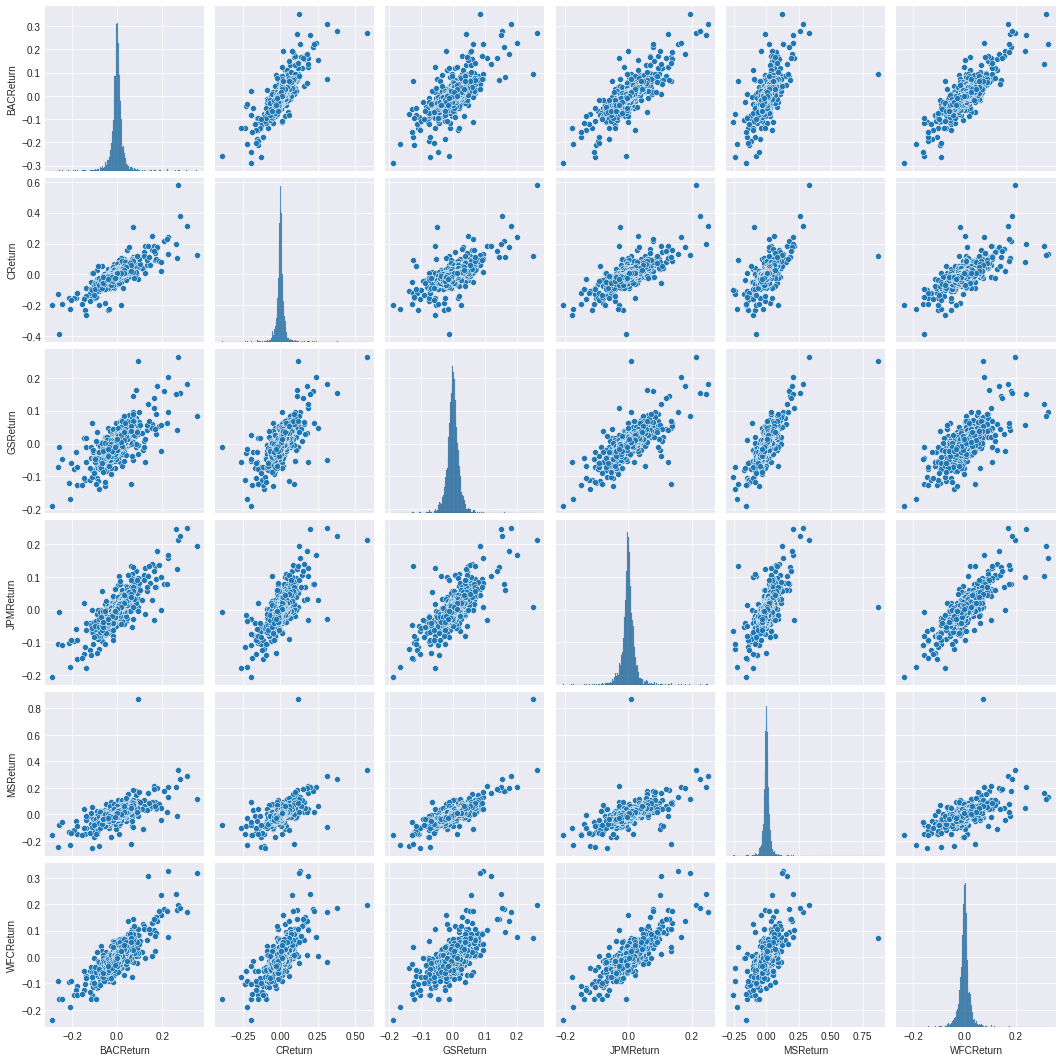

In [22]:
# Gráfico de retorno dos bancos
sns.pairplot(returns[1:]);

In [64]:
# Selecionando o pior dia de retorno de cada banco
returns.idxmin()

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [65]:
# Selecionando o melhor dia de retorno de cada banco
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [66]:
# Maior volatilidade (desvio padrão) de cada ação em todo o período.
returns.std()

BACReturn    0.031595
CReturn      0.033372
GSReturn     0.023272
JPMReturn    0.024554
MSReturn     0.032454
WFCReturn    0.027137
dtype: float64

In [67]:
# Maior risco em um determinado ano (2020 por exemplo)
returns[(returns.index.date >= dt.date(2020, 1, 1)) & (returns.index.date < dt.date(2021, 1, 1))].std()

BACReturn    0.036933
CReturn      0.042502
GSReturn     0.032929
JPMReturn    0.034272
MSReturn     0.036164
WFCReturn    0.038573
dtype: float64

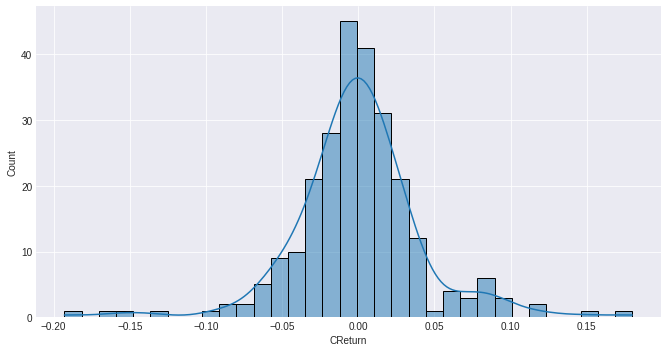

In [68]:
# Gráfico de distribuição dos retornos do CitiGroup (maior risco) em 2020
sns.displot(returns[(returns.index.date >= dt.date(2020, 1, 1)) & (returns.index.date < dt.date(2021, 1, 1))]['CReturn'], kde=True, aspect=15/8);

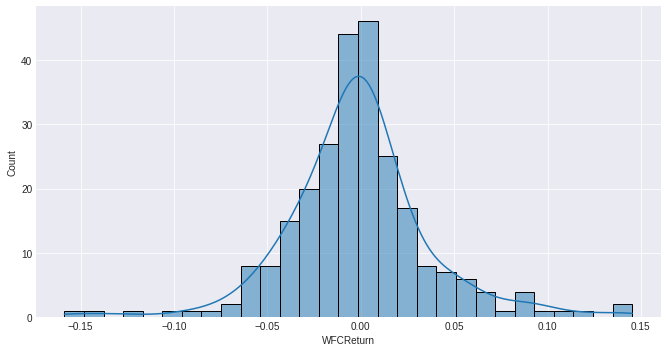

In [69]:
# Gráfico de distribuição dos retornos do Wells Fargo (segundo maior risco) em 2020
sns.displot(returns[(returns.index.date >= dt.date(2020, 1, 1)) & (returns.index.date < dt.date(2021, 1, 1))]['WFCReturn'], kde=True, aspect=15/8);

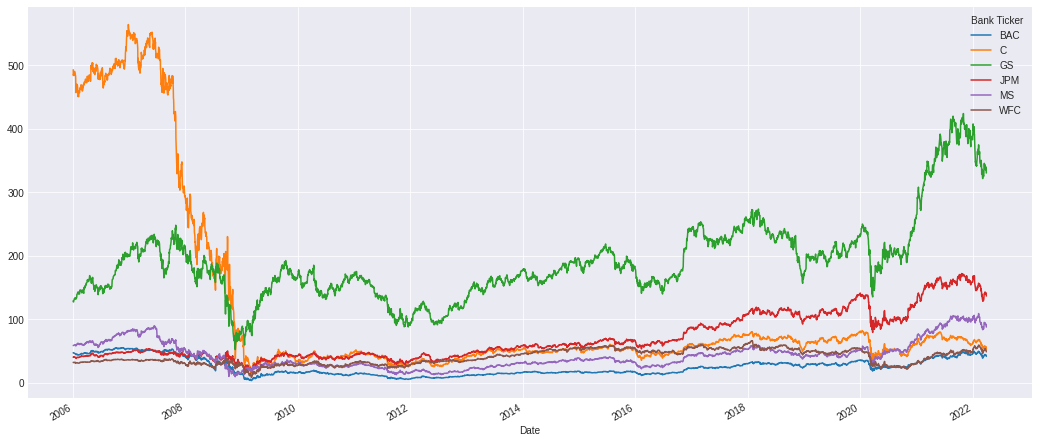

In [72]:
# Exibindo o preço de fechamento de cada banco para todo o período
bank_stocks.xs(key='Close', level='Stock Info', axis=1).plot(figsize=(18, 8));

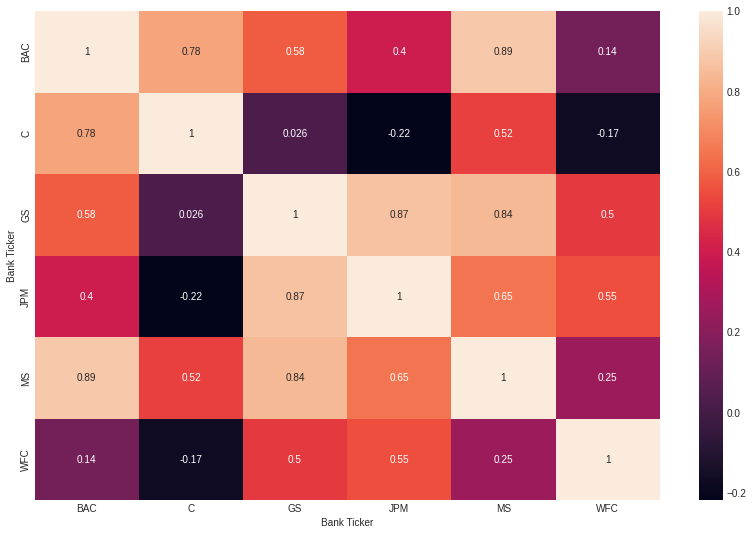

In [78]:
# Mapa de calor da correlação entre as ações
corr_matrix = bank_stocks.xs(key='Close', level='Stock Info', axis=1).corr()
plt.figure(figsize=(14, 9))
sns.heatmap(corr_matrix, annot=True);

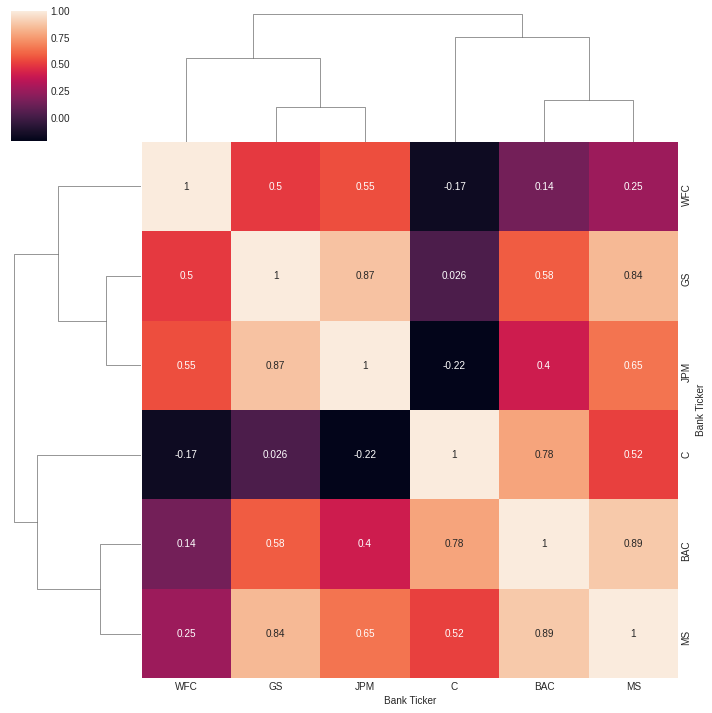

In [79]:
# Agrupando as correlações
sns.clustermap(corr_matrix, annot=True)